# 라이브러리 import

In [7]:
# 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
corona = pd.read_csv("./data/covid_19_clean_complete.csv")
corona.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# 데이터 프레임 정보 확인

In [9]:
corona.info()
# 날짜 형식이 object라는 거니까 이거 나중에 float이나 int로 바꿔주는거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


# 결측값(NaN) 확인하는 팁

In [10]:
corona.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

# 데이터타입 수정하기
* date 컬럼이 날짜 타입(datetime) 형식으로 안되어 있으니까 바꿔주자

In [11]:
corona['date'] =pd.to_datetime(corona['Date'])
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  object        
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
 10  date            49068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 4.1+ MB


# 코로나 국가별 최근 확진자, 사망자, 회복자 데이터 분석

In [12]:
# 최근 날짜 마스크 만들기
recent_mask = corona ['Date'] == max(corona['Date'])

# 최근 데이터만 추출
corona_recent = corona[recent_mask]
corona_recent.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,date
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,2020-07-27
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe,2020-07-27
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa,2020-07-27
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe,2020-07-27
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa,2020-07-27


# 국가별 합계 구하기

In [13]:
column_names = ["Confirmed", "Deaths", "Recovered"]
corona_recent_sum_by_country = corona_recent.groupby("Country/Region")[column_names].sum()
corona_recent_sum_by_country.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,36263,1269,25198
Albania,4880,144,2745
Algeria,27973,1163,18837
Andorra,907,52,803
Angola,950,41,242


# 사망자가 많은 순으로 정렬

In [14]:
corona_death_sort = corona_recent_sum_by_country.sort_values(by="Deaths", ascending=False)
corona_death_sort

,Confirmed,Deaths,Recovered
Country/Region,,,
US,4290259,148011,1325804
Brazil,2442375,87618,1846641
United Kingdom,301708,45844,1437
Mexico,395489,44022,303810
Italy,246286,35112,198593
...,...,...,...
Laos,20,0,19
Greenland,14,0,13
Cambodia,226,0,147


In [15]:
corona_death_sort.style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered
Country/Region,,,
US,4290259,148011,1325804
Brazil,2442375,87618,1846641
United Kingdom,301708,45844,1437
Mexico,395489,44022,303810
Italy,246286,35112,198593
India,1480073,33408,951166
France,220352,30212,81212
Spain,272421,28432,150376
Peru,389717,18418,272547


# 시간에 따른 확진자, 사망자, 회복자

In [16]:
# 날짜별 확진자, 사망자, 회복자 합계 구하기
column_names = ["Confirmed", "Deaths", "Recovered"]
corona_recent_sum_by_date = corona.groupby("Date")[column_names].sum()
corona_recent_sum_by_date.head()


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


# 시간에 따른 누적 확진자, 사망자, 회복자 시각화

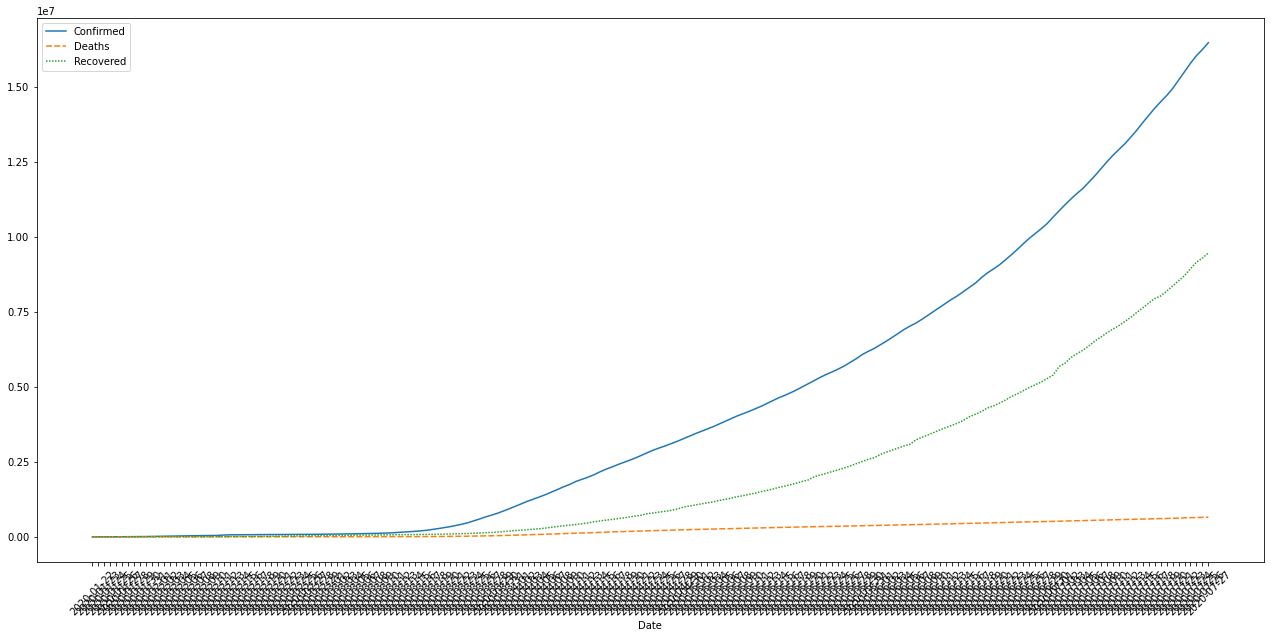

In [17]:
plt.figure(figsize=(22,10))
plt.xticks(rotation=45)
sns.lineplot(data= corona_recent_sum_by_date)
plt.show()

# folium을 이용한 시각화

In [18]:
# WGS84 -> App 위도: 가로줄 경도: 세로줄
# Bessel 좌표계:  

In [19]:
import folium

In [20]:
location=[37.5256967, 126.888587]
f_map = folium.Map(location=location)
f_map

In [21]:
f_map = folium.Map(location=location, zoom_start=17)
f_map

### 마커 활용하기

In [22]:
f_map = folium.Map(location=location, zoom_start=17)
folium.Marker(
    location=location, # 마커의 좌표
    popup='코딩지옥', # 마커 클릭하면 나오는 팝업 메시지
    icon=folium.Icon(color="red", icon="star") # 아이콘 모양
).add_to(f_map)

f_map

### 원형 마커

In [23]:
f_map = folium.Map(location=location, zoom_start=17)

folium.CircleMarker(
    location,
    radius = 100, # 반지름
    color="#F7D340", # 테두리 색상
    fill=True, # 원 안쪽 색상 채우기
    fill_color="#08088A", # 원 안쪽 색상
    popup="샘이 공부하는 곳"
).add_to(f_map)

f_map

# 전 세계 코로나 바이러스 감염 지도 표시

In [24]:
corona_recent.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,date
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,2020-07-27
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe,2020-07-27
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa,2020-07-27
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe,2020-07-27
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa,2020-07-27


In [25]:
column_names = ["Country/Region", "Lat", "Long", "Confirmed"]
corona_recent_data = corona_recent.loc[:, column_names]
corona_recent_data

,Country/Region,Lat,Long,Confirmed
48807,Afghanistan,33.939110,67.709953,36263
48808,Albania,41.153300,20.168300,4880
48809,Algeria,28.033900,1.659600,27973
48810,Andorra,42.506300,1.521800,907
48811,Angola,-11.202700,17.873900,950
...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,865
49064,Yemen,15.552727,48.516388,1691
49065,Comoros,-11.645500,43.333300,354
49066,Tajikistan,38.861000,71.276100,7235


### 인덱스 재구성 - 'reset_index'`

In [26]:
corona_recent_data = corona_recent_data.reset_index(drop=True) # 원본 인덱스를 컬럼으로 따로 빼준다.
corona_recent_data.head()

,Country/Region,Lat,Long,Confirmed
0,Afghanistan,33.93911,67.709953,36263
1,Albania,41.15330,20.168300,4880
2,Algeria,28.03390,1.659600,27973
3,Andorra,42.50630,1.521800,907
4,Angola,-11.20270,17.873900,950


In [27]:
import numpy as np
f_map = folium.Map(location = (0,0), zoom_start=3)

for idx in corona_recent_data.index: # 위경도
    lat = corona_recent_data["Lat"][idx] # [idx] 붙이는 건 배열 선택(idx번째 row를 선택한 것)
    lng = corona_recent_data["Long"][idx]
    # 나라 이름
    c_name = corona_recent_data["Country/Region"][idx]
    # 누적 확진자
    confirmed = corona_recent_data["Confirmed"][idx]
    
    folium.CircleMarker(
        location=[lat,lng],
        radius= np.log(confirmed)*2,
        popup=f"{c_name} / {confirmed}",
        fill = True,
        color = 'blue',
        fill_color = 'red'
    ).add_to(f_map)
# 확진자 수를 반지름으로 놓기에는 확진자 수가 너무 많음. radius=comfirmed/10000이런식으로
# np.log(confirmed)*2
f_map